In [1]:
import pandas as pd
import numpy as np

Carregar dataset

In [2]:
df = pd.read_csv('../Data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


É necessário verificar se existe algum campo vazio, ou seja, NA.

In [3]:
df.isna().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

Verificar tipos dos campos

In [4]:
df.dtypes

Month                      object
Thousands of Passengers     int64
dtype: object

O dataset parece estar ordenado por data, ou seja, é uma série temporal, e não possúi campos vazios. Nesse caso, indexar a série a data. Para isso, é necessário primeiro converter o campo "Month", referente a data, em formato DATETIME.

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

Month                      datetime64[ns]
Thousands of Passengers             int64
dtype: object

In [6]:
df.set_index('Month', inplace=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Agora é necessário informar a frequência dos dados da série temporal. Os dados são mensais, então, vou usar a frequência 'MS', referente a dados mensais.

In [8]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [9]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [10]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [13]:
test_predictions = fitted_model.forecast(36)

In [14]:
test_predictions

1958-02-01    331.649486
1958-03-01    388.989620
1958-04-01    380.125229
1958-05-01    388.290918
1958-06-01    453.379218
1958-07-01    502.248556
1958-08-01    490.986946
1958-09-01    424.051080
1958-10-01    365.391637
1958-11-01    318.392248
1958-12-01    360.320761
1959-01-01    369.905596
1959-02-01    359.903247
1959-03-01    422.128281
1959-04-01    412.508718
1959-05-01    421.370056
1959-06-01    492.003333
1959-07-01    545.035930
1959-08-01    532.814925
1959-09-01    460.176683
1959-10-01    396.519947
1959-11-01    345.516603
1959-12-01    391.017074
1960-01-01    401.418457
1960-02-01    390.563992
1960-03-01    458.090078
1960-04-01    447.651009
1960-05-01    457.267258
1960-06-01    533.917900
1960-07-01    591.468430
1960-08-01    578.206298
1960-09-01    499.379886
1960-10-01    430.300129
1960-11-01    374.951726
1960-12-01    424.328457
1961-01-01    435.615951
Freq: MS, dtype: float64

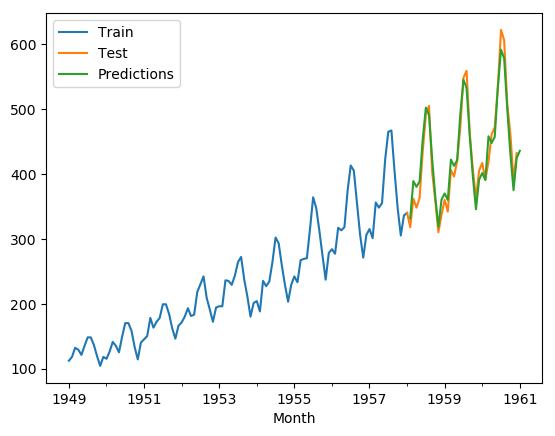

In [15]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Predictions')

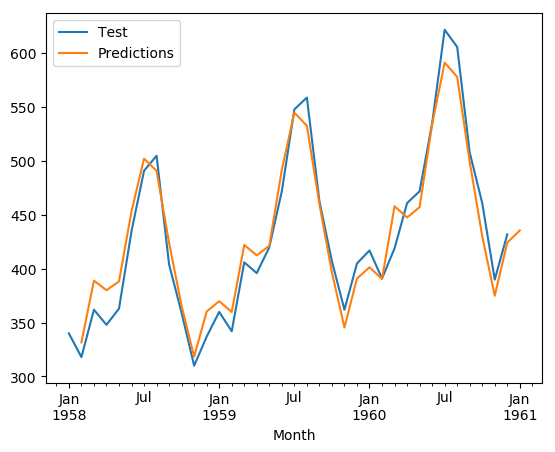

In [16]:
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Predictions')

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [18]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [19]:
mean_absolute_error(test_data, test_predictions)

46.30290458016069

In [20]:
mean_squared_error(test_data, test_predictions)

3075.328467280274

In [21]:
np.sqrt(mean_squared_error(test_data, test_predictions))

55.455644142686445

Considerando que as métricas não quadradas (ou seja, mean absolute error e a raiz da mean squared error) não apresentaram valores maiores que o desvio padrão da base de dados original, podemos dizer que o modelo tem uma capacidade preditiva interessante.

In [22]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [23]:
forecast_predictions = final_model.forecast(36)

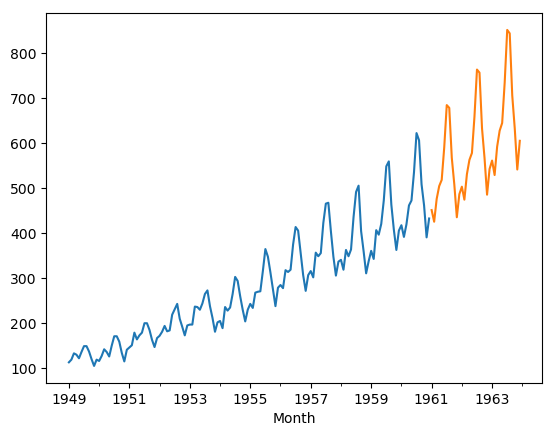

In [24]:
df['Thousands of Passengers'].plot()
forecast_predictions.plot()

Foi possível prever a série. Porém, a mesma não é estacionária, e provavelmente por isso estamos usando modelos de exponential smoothing.

In [25]:
df2 = pd.read_csv('../Data/samples.csv', index_col=0, parse_dates=True)

In [26]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


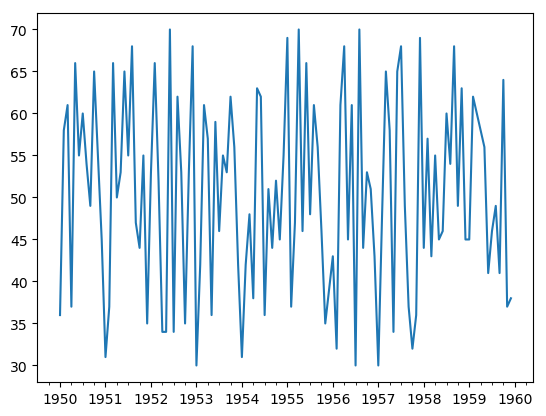

In [27]:
df2['a'].plot()

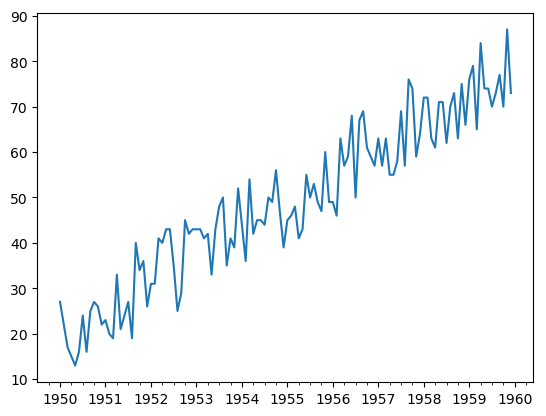

In [28]:
df2['b'].plot()

In [29]:
from statsmodels.tsa.statespace.tools import diff

In [30]:
df2['b'].diff(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
1950-07-01     8.0
1950-08-01    -8.0
1950-09-01     9.0
1950-10-01     2.0
1950-11-01    -1.0
1950-12-01    -4.0
1951-01-01     1.0
1951-02-01    -3.0
1951-03-01    -1.0
1951-04-01    14.0
1951-05-01   -12.0
1951-06-01     3.0
1951-07-01     3.0
1951-08-01    -8.0
1951-09-01    21.0
1951-10-01    -6.0
1951-11-01     2.0
1951-12-01   -10.0
1952-01-01     5.0
1952-02-01     0.0
1952-03-01    10.0
1952-04-01    -1.0
1952-05-01     3.0
1952-06-01     0.0
              ... 
1957-07-01    11.0
1957-08-01   -12.0
1957-09-01    19.0
1957-10-01    -2.0
1957-11-01   -15.0
1957-12-01     5.0
1958-01-01     8.0
1958-02-01     0.0
1958-03-01    -9.0
1958-04-01    -2.0
1958-05-01    10.0
1958-06-01     0.0
1958-07-01    -9.0
1958-08-01     8.0
1958-09-01     3.0
1958-10-01   -10.0
1958-11-01    12.0
1958-12-01    -9.0
1959-01-01    10.0
1959-02-01     3.0
1959-03-01   -14.0
1959-04-01  

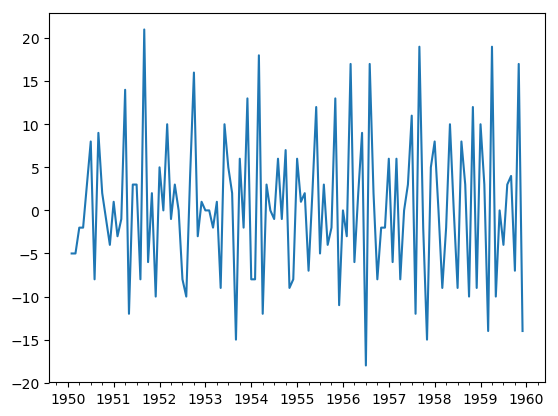

In [31]:
diff(df2['b'], k_diff=1).plot()

Introduzida estacionaridade, agora vem ACF e PACF, para tentar identificar qual a ordem dos componentes ARIMA

In [32]:
import statsmodels.api as sm

In [33]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [34]:
df1 = df.copy()
df1

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [35]:
df2 = pd.read_csv("../Data/DailyTotalFemaleBirths.csv", index_col='Date', parse_dates=True)

In [36]:
df2.index.freq = 'D'

In [37]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [38]:
from pandas.plotting import lag_plot

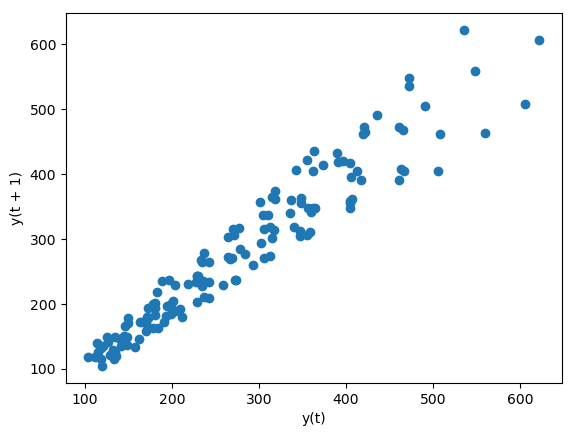

In [39]:
lag_plot(df1['Thousands of Passengers'])

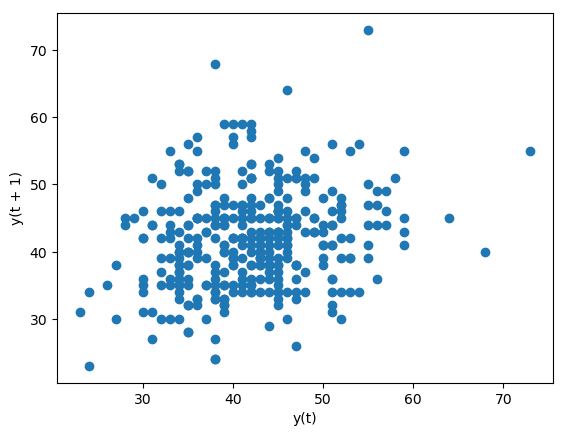

In [40]:
lag_plot(df2['Births'])

In [41]:
acf(df1['Thousands of Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

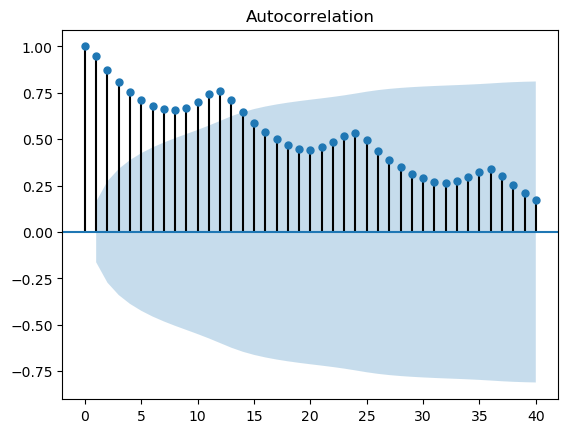

In [43]:
plot_acf(df1['Thousands of Passengers'], lags=40);

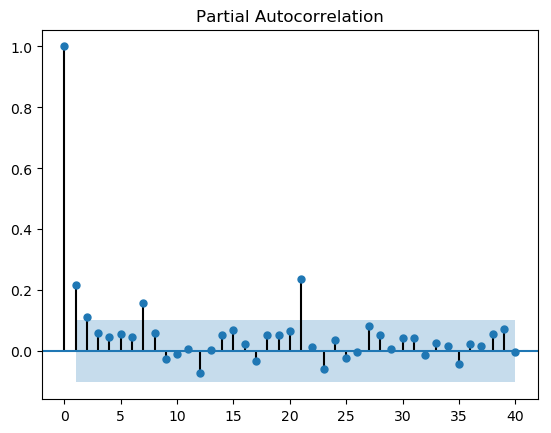

In [44]:
plot_pacf(df2['Births'], lags=40);

In [45]:
from statsmodels.tsa.ar_model import AR, ARResults

In [46]:
df = pd.read_csv('../Data/uspopulation.csv', index_col='DATE', parse_dates=True)

In [47]:
df.index.freq = 'MS'

In [48]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


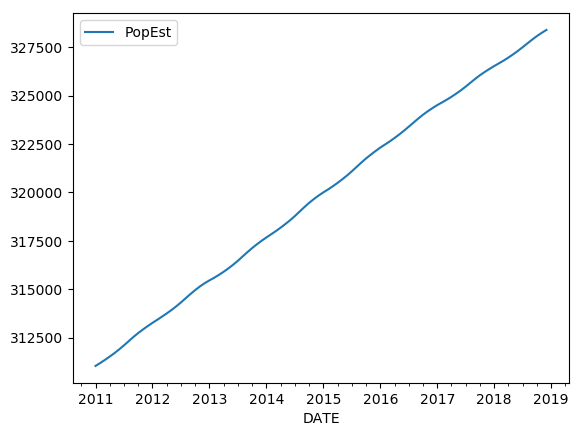

In [49]:
df.plot()

In [50]:
len(df)

96

In [51]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [52]:
model = AR(train['PopEst'])

In [53]:
AR1fit = model.fit(maxlag=1)

In [54]:
AR1fit.aic

6.410771237032002

In [55]:
AR1fit.k_ar

1

In [56]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [57]:
start = len(train)
end = len(train)+len(test)-1

In [58]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [59]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [60]:
predictions1 = AR1fit.predict(start=start, end=end)

In [61]:
predictions1 = predictions1.rename('AR1 Predictions')

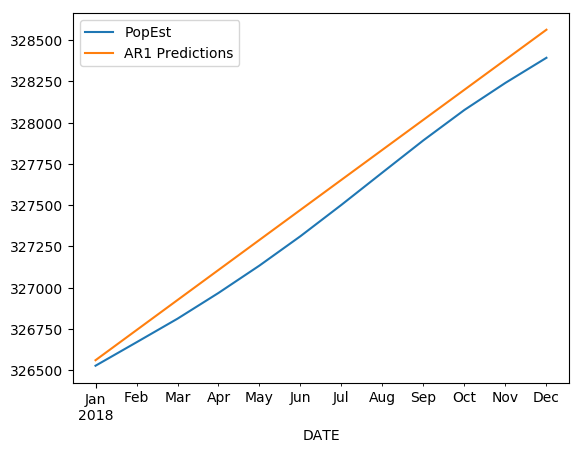

In [62]:
test.plot(legend=True)
predictions1.plot(legend=True)

In [63]:
AR2fit = model.fit(maxlag=2)

In [64]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [65]:
preditions2 = AR2fit.predict(start, end).rename('AR2 Predictions')

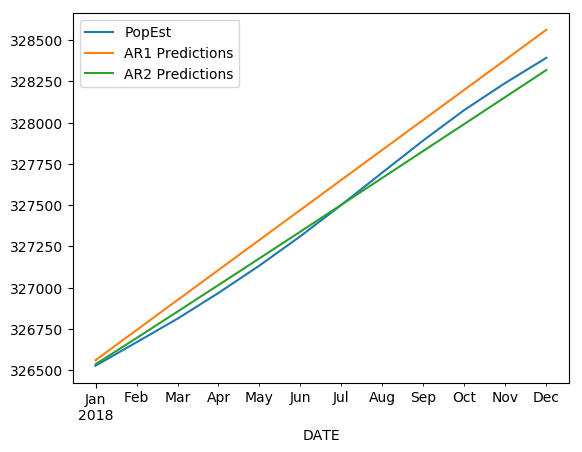

In [66]:
test.plot(legend=True)
predictions1.plot(legend=True)
preditions2.plot(legend=True)

In [67]:
ARfit = model.fit(ic='t-stat')

In [68]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [69]:
predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR8 Predictions')

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
labels = ['AR1', 'AR2', 'AR8']

In [72]:
preds = [predictions1, preditions2, predictions8]

In [73]:
for i in range(3):
    error=mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was:{error}')

AR1 MSE was:17449.71423207106
AR2 MSE was:2713.258660776706
AR8 MSE was:186.97526915372725


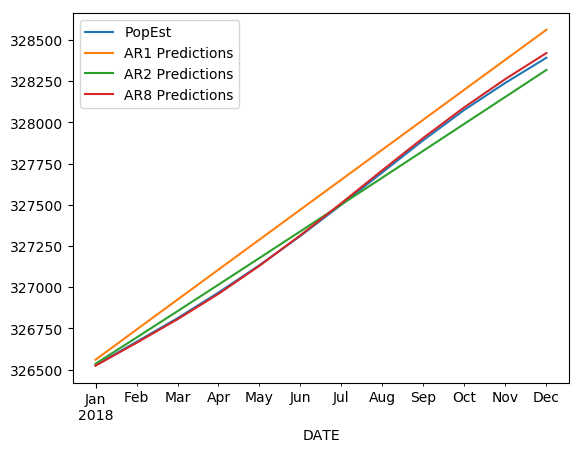

In [74]:
test.plot(legend=True)
predictions1.plot(legend=True)
preditions2.plot(legend=True)
predictions8.plot(legend=True)

In [75]:
model = AR(df['PopEst'])

In [76]:
ARfit = model.fit()

In [77]:
forecasted_values = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')

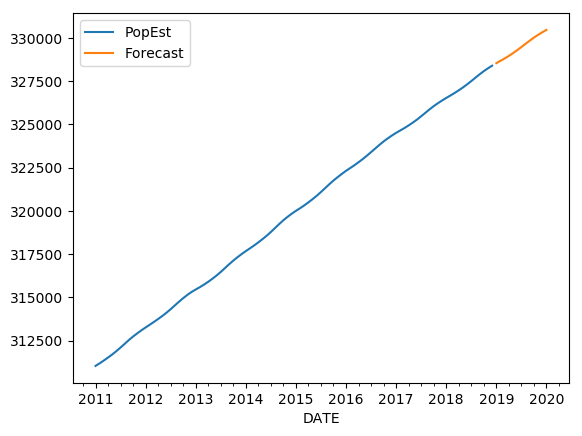

In [78]:
df['PopEst'].plot(legend=True)
forecasted_values.plot(legend=True)

In [79]:
df1 = pd.read_csv('../Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

In [80]:
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

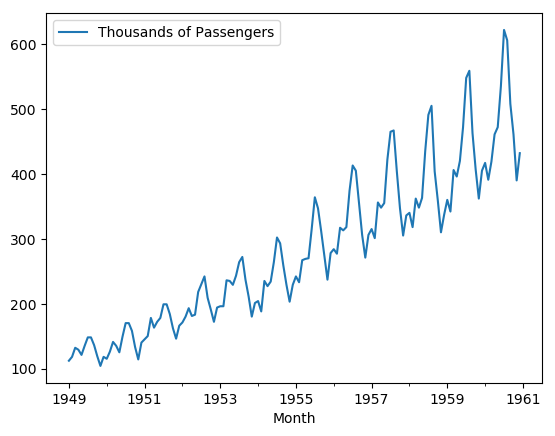

In [81]:
df1.plot()

In [82]:
from statsmodels.tsa.stattools import adfuller

In [83]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060513,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [84]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [85]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations'])

In [86]:
for key, val in dftest[4].items():
    dfout[f'critical value({key})'] = val

In [87]:
dfout

ADF Test Statistic       0.815369
p-value                  0.991880
# Lags Used             13.000000
# Observations         130.000000
critical value(1%)      -3.481682
critical value(5%)      -2.884042
critical value(10%)     -2.578770
dtype: float64

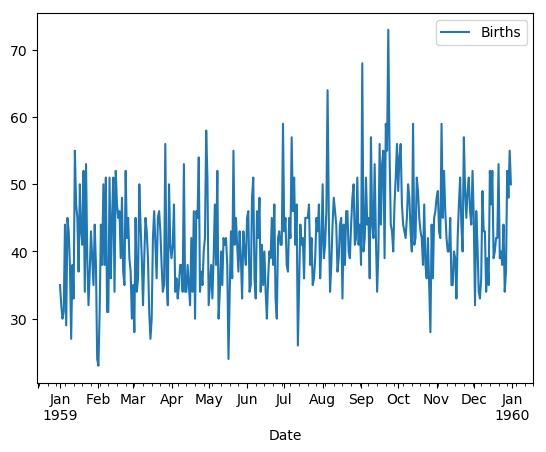

In [88]:
df2.plot()

In [89]:
adfuller(df2['Births'])

(-4.808291253559762,
 5.243412990149882e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [90]:
df3 = pd.read_csv('../Data/samples.csv', index_col=0, parse_dates=True)
df3.index.freq = 'MS'

In [91]:
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


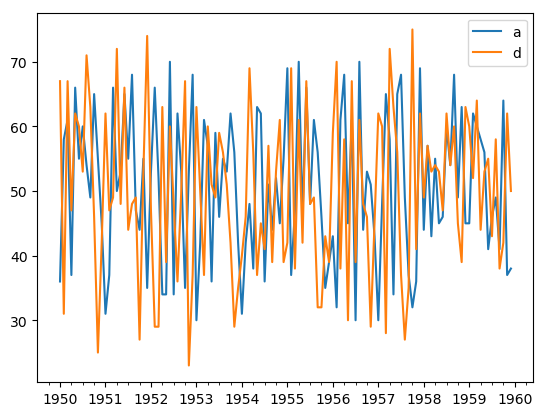

In [92]:
df3[['a','d']].plot()

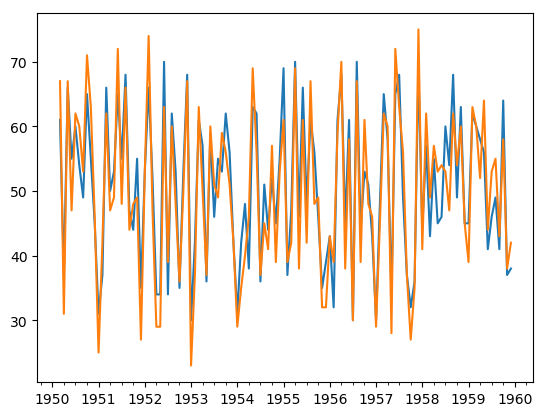

In [93]:
df3['a'].iloc[2:].plot()
df3['d'].shift(2).plot()

In [94]:
from statsmodels.tsa.stattools import grangercausalitytests

In [95]:
grangercausalitytests(df3[['a','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [96]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])

In [97]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


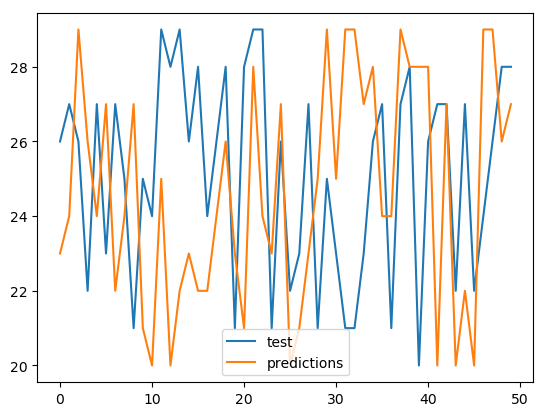

In [98]:
df.plot()

In [99]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [100]:
mse(df['test'], df['predictions'])

17.02

In [101]:
meanabs(df['test'], df['predictions'])

3.54

In [102]:
rmse(df['test'], df['predictions'])

4.125530268947253

In [103]:
df = pd.read_csv('../Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [104]:
df.index.freq = 'MS'

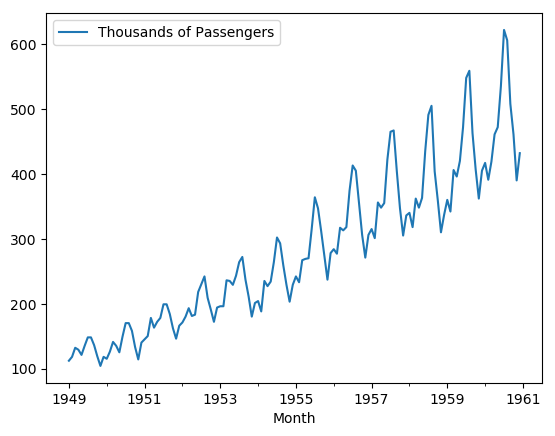

In [105]:
df.plot()

In [106]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

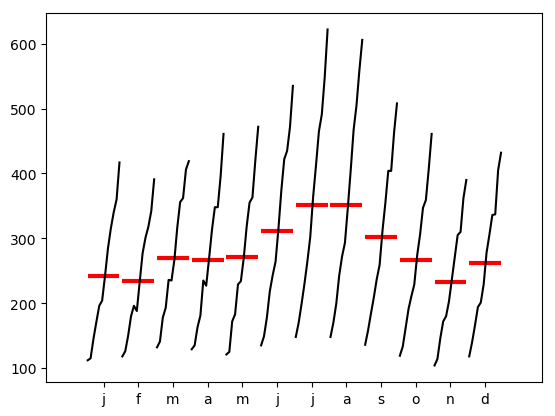

In [107]:
month_plot(df['Thousands of Passengers']);

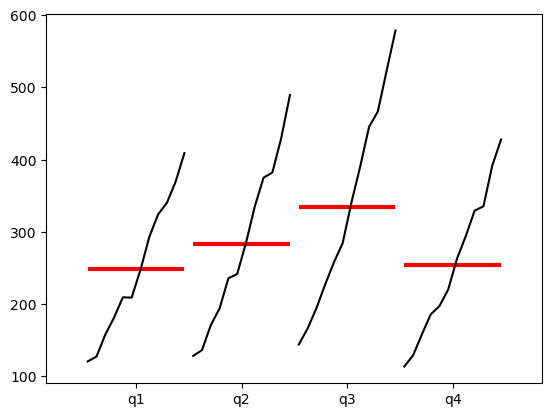

In [108]:
quarter_plot(df['Thousands of Passengers'].resample(rule='Q').mean());

In [109]:
df1 = df

In [110]:
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)


In [111]:
df2.index.freq = 'D'

In [112]:
from pmdarima import auto_arima

In [113]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=6, marx_q=3, seasonal=False, trace=True)

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instea

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.027 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.077 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.142 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.514, BIC=2480.000, Fit time=0.456 seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2); AIC=2462.110, BIC=2485.493, Fit time=0.671 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.225 seconds
Total fit time: 1.607 seconds


In [114]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Sun, 09 Oct 2022   AIC                           2460.154
Time:                        11:05:46   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [115]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, max_p=4, marx_q=4,
                            seasonal=True, trace=True,m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.027 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); data is likely non-stationary. (if you do not want to see these warnings, r

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.375 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, r

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1398.827, BIC=1407.716, Fit time=0.242 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1301.228, BIC=1316.042, Fit time=0.592 seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1304.383, BIC=1313.271, Fit time=0.261 seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1301.136, BIC=1315.950, Fit time=0.363 seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1278.175, BIC=1295.952, Fit time=1.027 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=1371.827, BIC=1386.641, Fit time=0.304 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1267.601, BIC=1288.341, Fit time=0.771 seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 3) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 3) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_or

Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1269.486, BIC=1287.263, Fit time=1.090 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=1344.044, BIC=1361.821, Fit time=0.691 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 5.799 seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_or

In [116]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -626.801
Date:                            Sun, 09 Oct 2022   AIC                           1267.601
Time:                                    11:05:52   BIC                           1288.341
Sample:                                         0   HQIC                          1276.029
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.168      4.169      0.000       0.372       1.033
ar.L1          1.4368      0.109     13.169      0.000       1.223       1.651
ar.L2         -0.7066      0.080     -8.815      0.000      -0.864      -0.549
ma.L1         -1.4832      0.174     -8.524      0.000      -1.824      -1.142
ma.L2          0.5033      0.175      2.877      0.004       0.160       0.846
ma.S.L12       0.7444      0.077      9.730      0.000       0.594       0.894
sigma2       345.6775     37.222      9.287      0.000     272.723     418.631
===================================================================================
Ljung-Box (Q):                      164.01   Jarque-Bera (JB):                10.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [118]:
df1 = df2[:120].copy()

In [119]:
df2 = pd.read_csv('../Data/TradeInventories.csv', index_col='Date', parse_dates=True)
df.index.freq = 'MS'

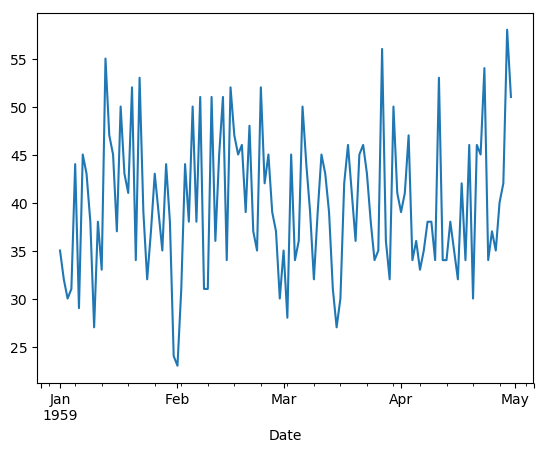

In [120]:
df1['Births'].plot()

In [121]:
adfuller(df1['Births'])

(-9.855384093160584,
 4.373545405991154e-17,
 0,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 723.9921310744033)

In [122]:
auto_arima(df1['Births'], seasonal=False).summary()

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[i

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Sun, 09 Oct 2022   AIC                            822.741
Time:                        11:05:54   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8163      0.108    368.931      0.000      39.605      40.028
ar.L1.y        1.8570      0.081     22.969      0.000       1.699       2.015
ar.L2.y       -0.8816      0.073    -12.051      0.000      -1.025      -0.738
ma.L1.y       -1.8636      0.109    -17.142      0.000      -2.077      -1.650
ma.L2.y        0.8636      0.108      8.029      0.000       0.653       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1581j            1.0651           -0.0237
AR.2            1.0533           +0.1581j            1.0651            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1580           +0.0000j            1.1580            0.0000
-----------------------------------------------------------------------------
"""

In [123]:
int(len(df1)*3/4)

90

In [124]:
train = df1.iloc[:int(len(df1)*3/4)]
test = df1.iloc[int(len(df1)*3/4):]

In [125]:
model = ARIMA(df1['Births'], order=(2,0,2))

In [126]:
results = model.fit()

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [127]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Sun, 09 Oct 2022   AIC                            822.741
Time:                        11:05:55   BIC                            839.466
Sample:                    01-01-1959   HQIC                           829.533
                         - 04-30-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.8163      0.108    368.931      0.000      39.605      40.028
ar.L1.Births     1.8570      0.081     22.969      0.000       1.699       2.015
ar.L2.Births    -0.8816      0.073    -12.051      0.000      -1.025      -0.738
ma.L1.Births    -1.8636      0.109    -17.142      0.000      -2.077      -1.650
ma.L2.Births     0.8636      0.108      8.029      0.000       0.653       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1581j            1.0651           -0.0237
AR.2            1.0533           +0.1581j            1.0651            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1580           +0.0000j            1.1580            0.0000
-----------------------------------------------------------------------------
"""

In [128]:
start = len(train)
end = len(df1)

In [129]:
predictions = results.predict(start,end).rename('ARMA22')

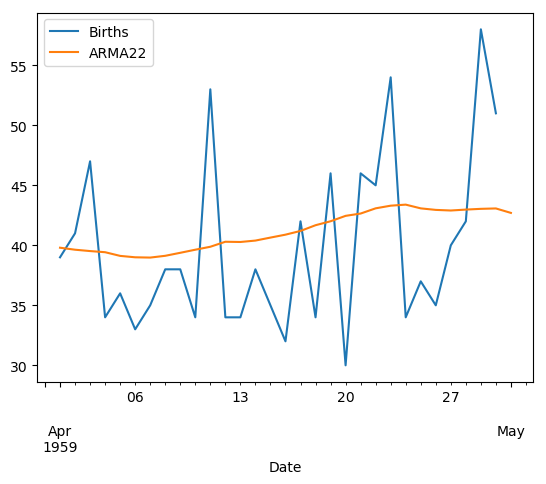

In [130]:
test['Births'].plot(legend=True)
predictions.plot(legend=True)

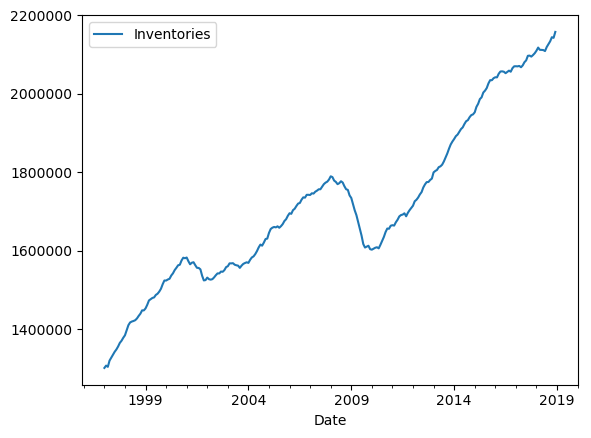

In [131]:
df2.plot()

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose

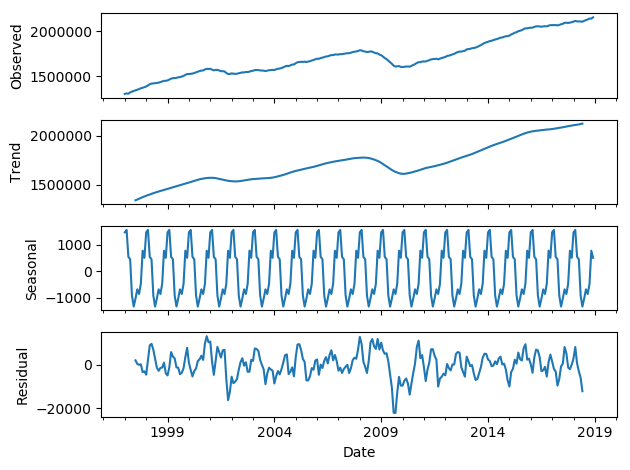

In [133]:
seasonal_decompose(df2['Inventories'], model='add').plot();

In [134]:
auto_arima(df2['Inventories'], seasonal=False).summary()

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result ei

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.257
Date:                Sun, 09 Oct 2022   AIC                           5228.505
Time:                        11:06:00   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3475.1601   1313.791      2.645      0.009     900.177    6050.143
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

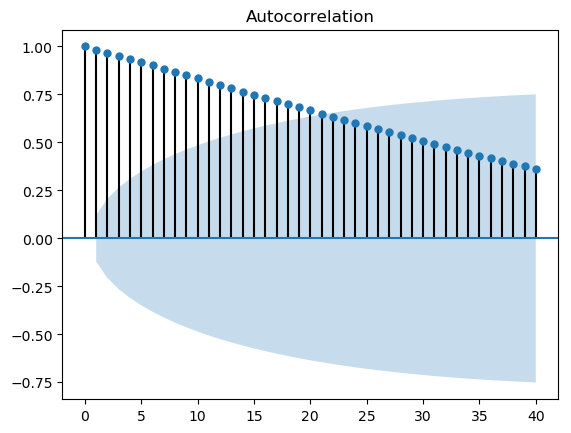

In [135]:
plot_acf(df2['Inventories'], lags=40);

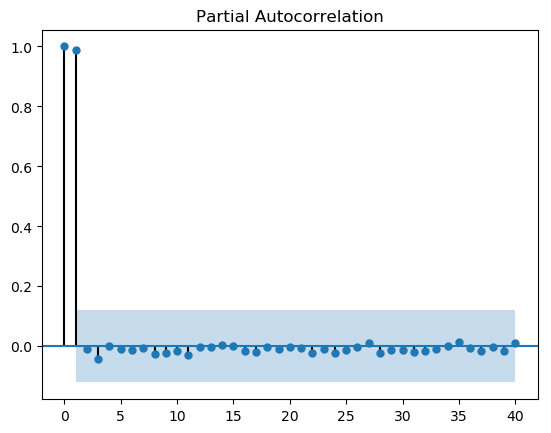

In [136]:
plot_pacf(df2['Inventories'], lags=40);

In [137]:
stepwise_fit = auto_arima(df2['Inventories'], start_p =0, start_q=0, max_p=2, max_q=2, seasonal=False, trace=True)

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instea

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.090 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.812, Fit time=0.041 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.112 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.529, BIC=5247.390, Fit time=0.193 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.137 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.295 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.907 seconds


d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


In [138]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.257
Date:                Sun, 09 Oct 2022   AIC                           5228.505
Time:                        11:06:02   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3475.1601   1313.791      2.645      0.009     900.177    6050.143
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [139]:
len(df2)

264

In [140]:
train = df2.iloc[:252]
test = df2.iloc[251:]

In [141]:
model = ARIMA(train['Inventories'], order=(1,1,1))

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [142]:
results = model.fit()

In [143]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.003
Date:                Sun, 09 Oct 2022   AIC                           4980.787
Time:                        11:06:02   BIC                           4994.889
Sample:                    02-01-1997   HQIC                          4986.462
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3250.5281   1345.107      2.417      0.016     614.168    5886.888
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1079           +0.0000j            1.1079            0.0000
MA.1            1.7917           +0.0000j            1.7917            0.0000
-----------------------------------------------------------------------------
"""

In [144]:
start = len(train)
end = len(df2)

In [145]:
predictions = results.predict(start=start, end=end,typ='levels').rename('ARIMA111')

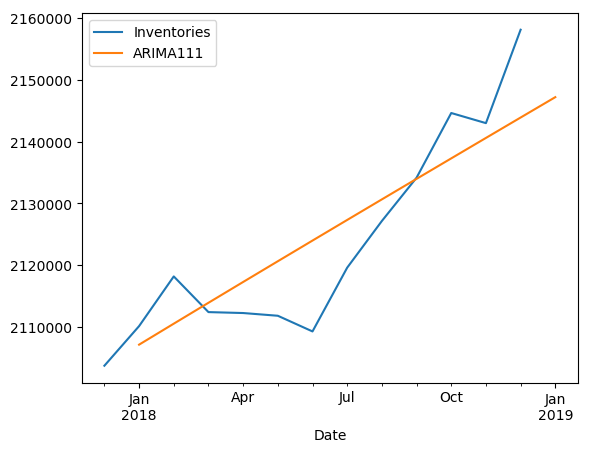

In [146]:
test.plot(legend=True)
predictions.plot(legend=True)

In [147]:
from statsmodels.tools.eval_measures import rmse

In [148]:
len(test['Inventories'])

13

In [149]:
rmse(test['Inventories'], predictions)

8374.725078898477

In [150]:
test['Inventories'].mean()

2123435.3076923075

In [151]:
predictions.mean()

2127277.806212643

In [152]:
model = ARIMA(df2['Inventories'], order=(1,1,1))

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [153]:
results = model.fit()

In [154]:
fcast = results.predict(start=len(df2), end=len(df2)+11, typ='levels').rename('ARIMA FORECAST')

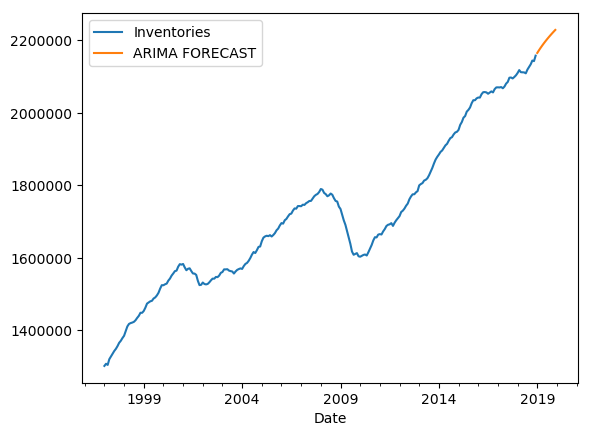

In [155]:
df2['Inventories'].plot(legend=True)
fcast.plot(legend=True)

In [156]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [157]:
df = pd.read_csv('../Data/co2_mm_mlo.csv')

In [158]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [159]:
df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':1})

In [160]:
df.set_index('date', inplace=True)

In [161]:
df.index.freq = 'MS'

In [162]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


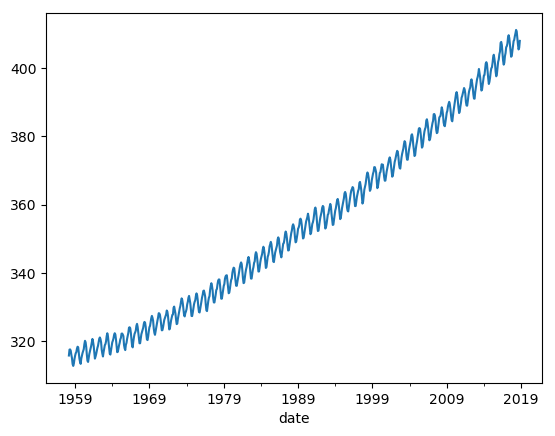

In [163]:
df['interpolated'].plot()

In [164]:
results =  seasonal_decompose(df['interpolated'], model='add')

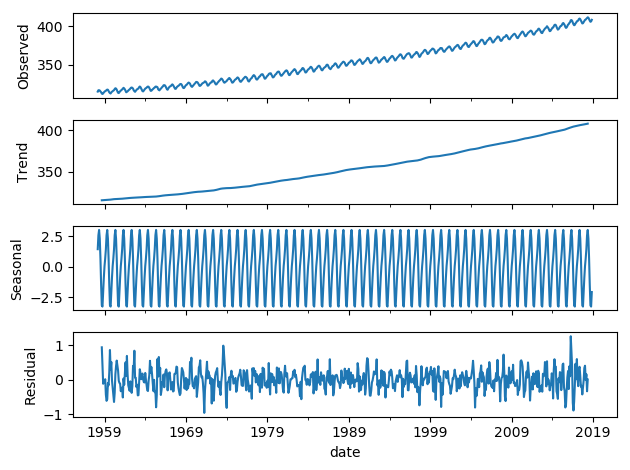

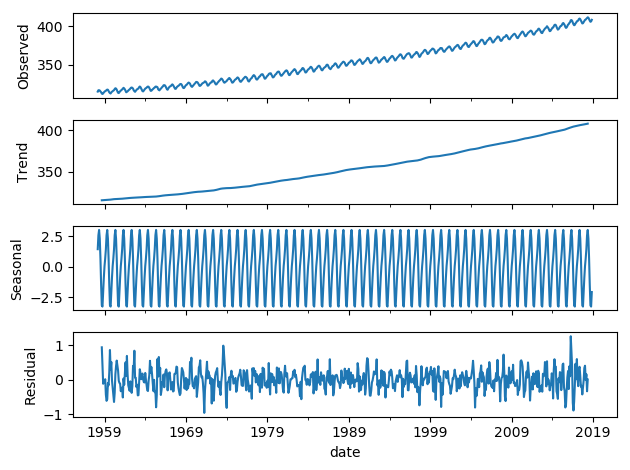

In [165]:
results.plot()

In [166]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maxi

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -207.631
Date:                            Sun, 09 Oct 2022   AIC                            425.263
Time:                                    11:07:44   BIC                            448.214
Sample:                                         0   HQIC                           434.119
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.001      1.201      0.230      -0.001       0.002
ma.L1         -0.3793      0.034    -11.207      0.000      -0.446      -0.313
ar.S.L12       0.9994      0.000   2805.722      0.000       0.999       1.000
ma.S.L12      -0.8601      0.022    -39.429      0.000      -0.903      -0.817
sigma2         0.0955      0.005     20.516      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       52.54   Jarque-Bera (JB):                 3.54
Prob(Q):                              0.09   Prob(JB):                         0.17
Heteroskedasticity (H):               1.10   Skew:                            -0.04
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
len(df)

729

In [168]:
train = df.iloc[:717]
test = df.iloc[717:]

In [169]:
model = SARIMAX(train['interpolated'], order=(0,1,1), seasonal_order=(1,0,1, 12)).fit()

In [170]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.149
Date:                            Sun, 09 Oct 2022   AIC                            418.297
Time:                                    11:07:46   BIC                            436.592
Sample:                                03-01-1958   HQIC                           425.362
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3707      0.033    -11.261      0.000      -0.435      -0.306
ar.S.L12       0.9997      0.000   3203.633      0.000       0.999       1.000
ma.S.L12      -0.8653      0.023    -37.848      0.000      -0.910      -0.820
sigma2         0.0959      0.005     20.244      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       52.06   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
start = len(train)
end = len(train) - 1 + len(test)

In [172]:
predictions = model.predict(start, end, typ='levels').rename('SARIMA')

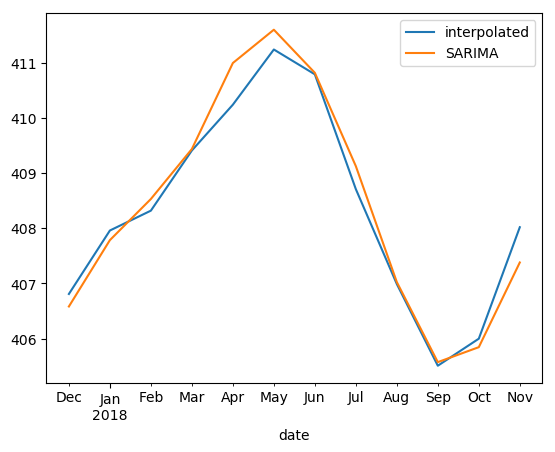

In [173]:
test['interpolated'].plot(legend=True)
predictions.plot(legend=True)

In [174]:
rmse(test['interpolated'], predictions)

0.3461008053868093

In [175]:
test['interpolated'].mean()

408.3333333333333

In [176]:
test['interpolated'].std()

1.8389440316429362

In [177]:
model = SARIMAX(df['interpolated'], order=(0,1,1), seasonal_order=(1,0,1, 12)).fit()


In [178]:
fcast = model.predict(len(df), len(df)+11, typ='levels').rename('FORECAST')

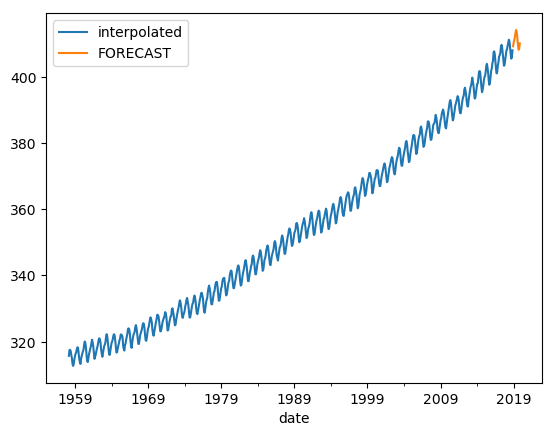

In [179]:
df['interpolated'].plot(legend=True)
fcast.plot(legend=True)

In [180]:
df = pd.read_csv('../Data/RestaurantVisitors.csv', index_col='date', parse_dates=True)

In [181]:
df.index.freq='D'

In [182]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [183]:
df1 = df.dropna()

In [184]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [185]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [186]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [187]:
for column in cols:
    df1[column] = df1[column].astype(int)

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


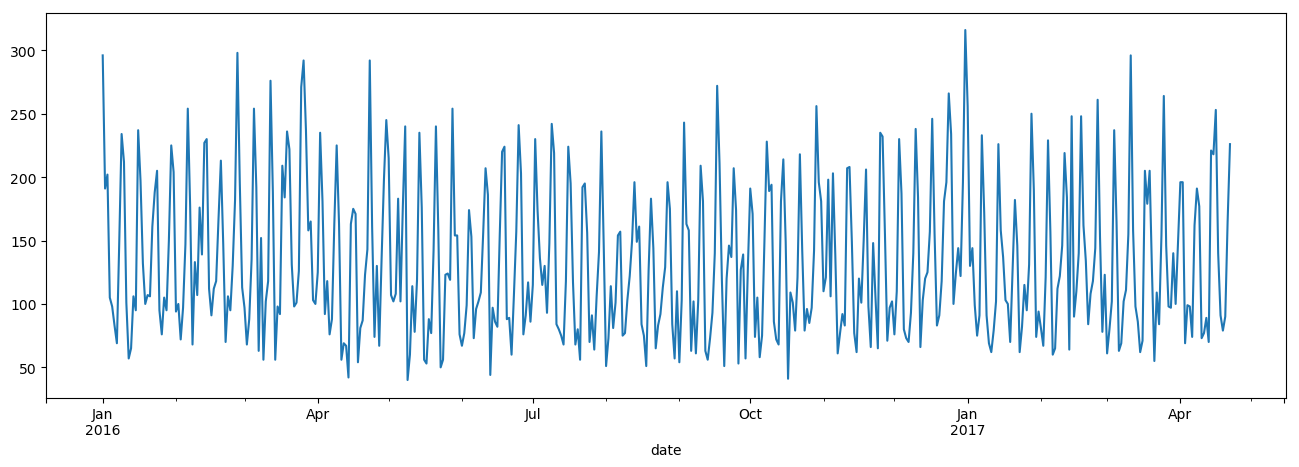

In [188]:
df1['total'].plot(figsize=(16,5))

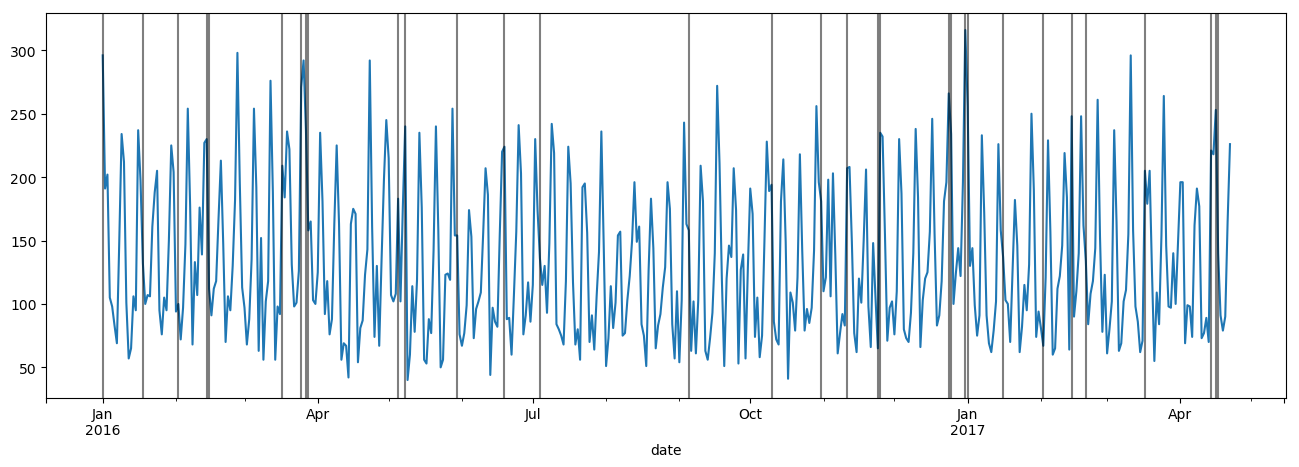

In [189]:
ax = df1['total'].plot(figsize=(16,5))
for x in df1.query('holiday==1').index:
    ax.axvline(x=x, color='k', alpha=0.5)

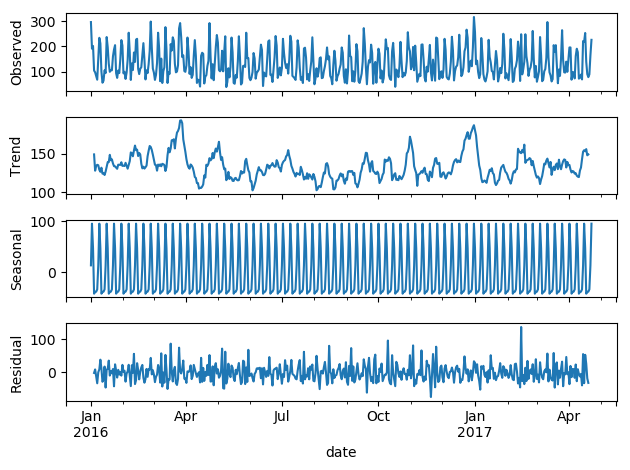

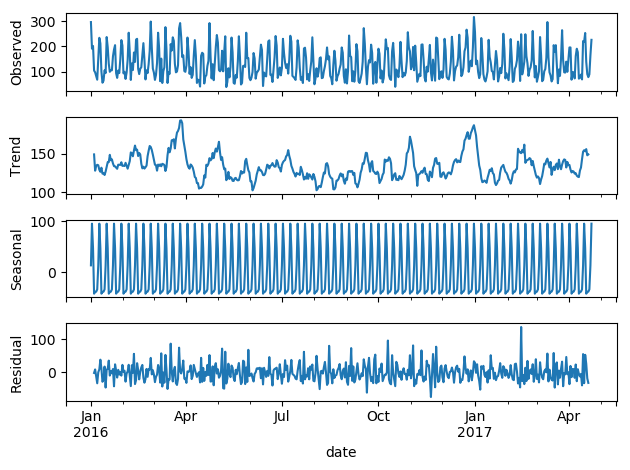

In [190]:
seasonal_decompose(df1['total']).plot()

In [191]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [192]:
auto_arima(df1['total'], m=7).summary()

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, whic

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Sun, 09 Oct 2022   AIC                           4845.442
Time:                                   11:08:12   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5665      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3999     86.679     16.468      0.000    1257.512    1597.288
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [193]:
model = SARIMAX(train['total'], order=(1,0,0), seasonal_order=(2,0,0,7), enforce_invertibility=False)

In [194]:
results = model.fit()

In [195]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sun, 09 Oct 2022   AIC                           4457.403
Time:                                   11:08:12   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [196]:
start = len(train)
end = len(train)+len(test)-1

In [197]:
predictions = results.predict(start,end).rename("Sarima")

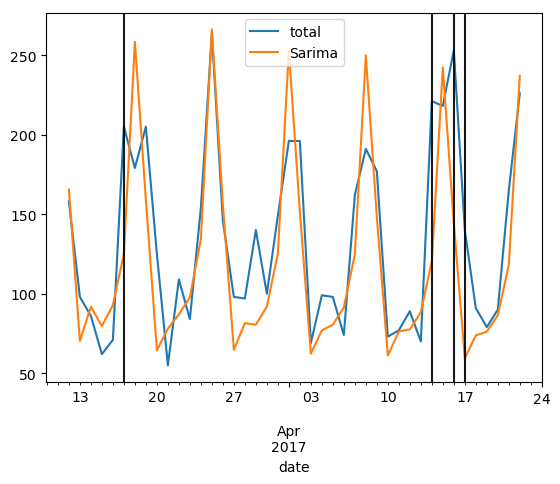

In [198]:
ax = test['total'].plot(legend=True)
predictions.plot(legend=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='k', alpha=0.9)

As linhas pretas representam feriados, o que pode ser indício de que a presença de feriados interfere no valor final

In [199]:
rmse(test['total'], predictions)

41.263154982204675

In [200]:
test['total'].mean()

134.26190476190476

In [201]:
test['total'].std()

58.11471394381285

In [202]:
auto_arima(df1['total'], exogenous=df1[['holiday']], m=7).summary()

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representa

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.630
Date:                           Sun, 09 Oct 2022   AIC                           4709.261
Time:                                   11:08:41   BIC                           4734.278
Sample:                                        0   HQIC                          4719.096
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5517      4.274      2.703      0.007       3.174      19.929
x1            74.8146      4.544     16.464      0.000      65.908      83.721
ma.L1          0.1781      0.051      3.474      0.001       0.078       0.279
ar.S.L7        0.5062      0.045     11.238      0.000       0.418       0.594
ar.S.L14       0.3844      0.043      8.985      0.000       0.301       0.468
sigma2      1141.8775     80.175     14.242      0.000     984.738    1299.017
===================================================================================
Ljung-Box (Q):                       85.13   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [203]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1,0,1), seasonal_order=(1,0,1,7), enforce_invertibility=False)

In [204]:
result = model.fit()

d:\Anaconda\Anaconda_Instalado\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [205]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2123.637
Date:                           Sun, 09 Oct 2022   AIC                           4259.275
Time:                                   11:08:43   BIC                           4283.741
Sample:                               01-01-2016   HQIC                          4268.930
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       50.5780      1.803     28.049      0.000      47.044      54.112
ar.L1          0.9999   7.68e-05    1.3e+04      0.000       1.000       1.000
ma.L1         -1.5174      0.045    -33.896      0.000      -1.605      -1.430
ar.S.L7        0.9999      0.000   5161.402      0.000       1.000       1.000
ma.S.L7       -1.0400      0.019    -55.750      0.000      -1.077      -1.003
sigma2       271.2666      9.935     27.305      0.000     251.795     290.738
===================================================================================
Ljung-Box (Q):                       41.15   Jarque-Bera (JB):                10.38
Prob(Q):                              0.42   Prob(JB):                         0.01
Heteroskedasticity (H):               1.01   Skew:                             0.23
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [206]:
start = len(train)
end = len(train) + len(test) - 1

In [207]:
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX')

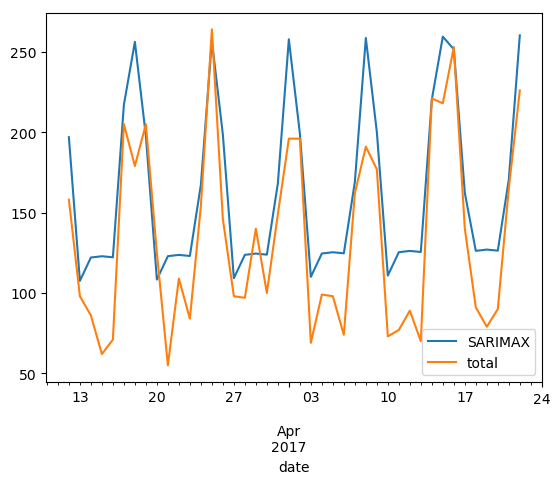

In [208]:
predictions.plot(legend=True)
test['total'].plot(legend=True)

In [209]:
rmse(test['total'], predictions)

37.2121903810698

In [212]:
df = pd.read_csv('../Data/M2SLMoneyStock.csv', index_col=0, parse_dates=True)
df = df.asfreq('MS')

In [213]:
sp = pd.read_csv('../Data/PCEPersonalSpending.csv', index_col=0, parse_dates=True)
sp = sp.asfreq('MS')

In [214]:
from statsmodels.tsa.api import VAR

In [215]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [216]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [217]:
df = df.join(sp)

In [218]:
df.dropna(inplace=True)

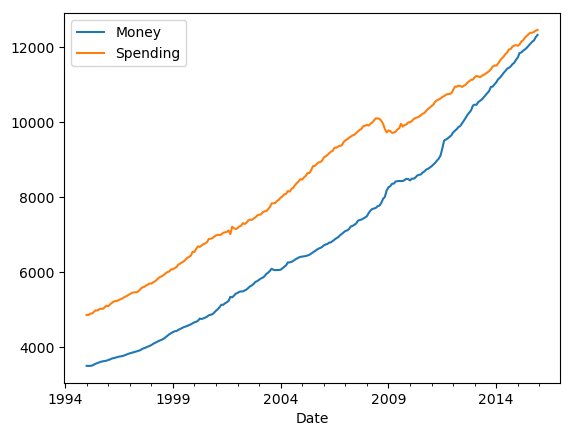

In [219]:
df.plot()

In [220]:
adfuller(df['Money'])

(4.239022425670653,
 1.0,
 4,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2219.917877142354)

In [221]:
adfuller(df['Spending'])

(0.14979608598625846,
 0.9693009944428315,
 3,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2339.735574840993)

In [222]:
df_transformed = df.diff().copy()

In [225]:
df_transformed.dropna(inplace=True)

In [226]:
adfuller(df_transformed['Money'])

(-2.057404049737941,
 0.26198379785112386,
 15,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2222.9483460694405)

In [227]:
adfuller(df_transformed['Spending'])

(-7.226973930850655,
 2.0410272592128896e-10,
 2,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2328.23145843905)

In [228]:
df_transformed = df_transformed.diff().dropna()

In [229]:
adfuller(df_transformed['Money'])

(-7.077470794343021,
 4.760674931295975e-10,
 14,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2217.097202826827)

In [230]:
nobs = 12

In [231]:
train = df_transformed[:-nobs]
test = df_transformed[-nobs:]

In [232]:
model = VAR(train)

for p in range(8):
    results = model.fit(p)
    print(f'Order {p}')
    print(f'AIC: {results.aic}')

Order 0
AIC: 14.74710921809045
Order 1
AIC: 14.178610495220898
Order 2
AIC: 13.955189367163705
Order 3
AIC: 13.849518291541038
Order 4
AIC: 13.827950574458281
Order 5
AIC: 13.78730034460964
Order 6
AIC: 13.799076756885809
Order 7
AIC: 13.797638727913972


In [233]:
results = model.fit(5)

In [234]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Oct, 2022
Time:                     12:18:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [235]:
# A função forecast, para o VAR, precisa de 2 valores. 1 deles é Y, que precisa ser um nparray.
# Esse nparray precisa conter o número de variáveis (como colunas) e o número da ordem do modelo var
# (no nosso caso, o var é de ordem 5, ou seja, considera 5 lags, logo, precisamos fornecer 5 lags)
# para que o forecast seja capaz de prever as proximas entradas.
train.values[-5:]

array([[-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [237]:
predictions = results.forecast(y=train.values[-5:], steps=12)

In [238]:
idx = pd.date_range('2015-01-01',periods=12,freq='MS')

In [239]:
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [240]:
df_forecast = pd.DataFrame(data=predictions, index=idx, columns=['Money_2d', 'Spending_2d'])

In [241]:
df_forecast

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


In [242]:
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults